# Day 04
Day 4 exercises are in Day_04.py.

In [205]:
%run Day_04.py

450 True
ANS Q1: Number of different companies (not accounting for spelling): 439
76                                   BIMMY'S LLC
100    Christie's Fine Art Storage Services, Inc
101                              Christie's Inc.
155                   FALCONE'S COOKIELAND, LTD.
262                              M & R CPA's LLP
270                       Maribel's Sweets, Inc.
294                             Neuman's Kitchen
317                      Pain D'Avignon III Ltd.
345                ROGELIO'S WAY/DIGITAL LAUNDRY
370                            SIMON''S HARDWARE
388                  SWEET SAM'S BAKING CO., LLC
410                  TUFO'S WHOLESALE DAIRY INC.
Name: Company_Name, dtype: object

0                             1 state street
1                             100 church llc
2                       100 wall investments
3                1 10 bush terminal owner lp
4      120 broadway acquisitions jv llc ldmk
                       ...                  
445                      

<br><br>
# Day 05
First, general stuff that we will need.

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("Done with imports")

Done with imports


## 1. *Total jobs created* &nbsp; vs &nbsp; *average savings*
This is fairly straightforward. Load the data frame first.

In [207]:
df = pd.read_csv("Q4_out.csv") #Data for NTAs with at least 5 businesses
#df

<br><br><br>And now, the plots.

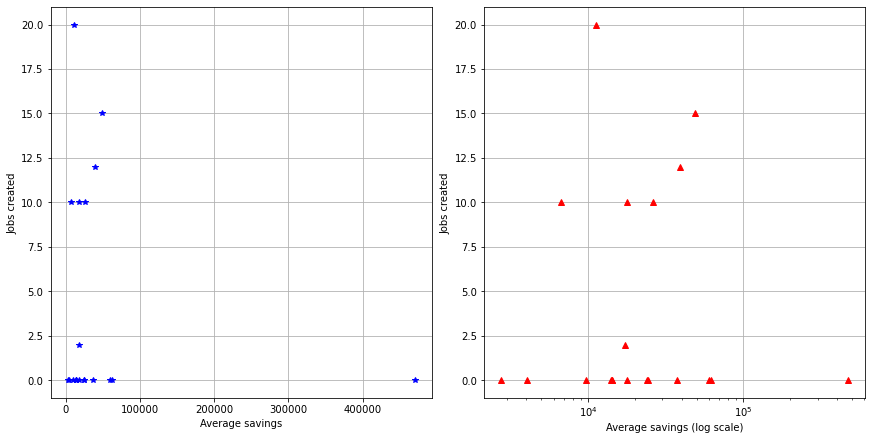

In [208]:
av_sav = df.Average_total_savings.to_numpy()
tot_jobs = df.Total_jobs_created.to_numpy()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (12, 6), layout="constrained")

#linear savings scale
ax0.set_xlabel("Average savings")
ax0.set_ylabel("Jobs created")
ax0.plot(av_sav, tot_jobs, "b*") #could use .scatter, but it doesn't matter much in this case
ax0.grid(True)

#log savings scale
ax1.set_xlabel("Average savings (log scale)")
ax1.set_ylabel("Jobs created")
ax1.set_xscale("log")
ax1.plot(av_sav, tot_jobs, "r^"); #could use .scatter, but it doesn't matter much in this case
ax1.grid(True)


<br><br>
## 2. Histogram of the log of the average total savings
NOTE: there are only 20 NTAs with at least 5 businesses in the dataset. Doing a histogram on 20 points does not seem very representative. Thus, we will do both cases: histogram for 20 NTAs with >5 businesses, and another histogram for **all** 79 NTAs.

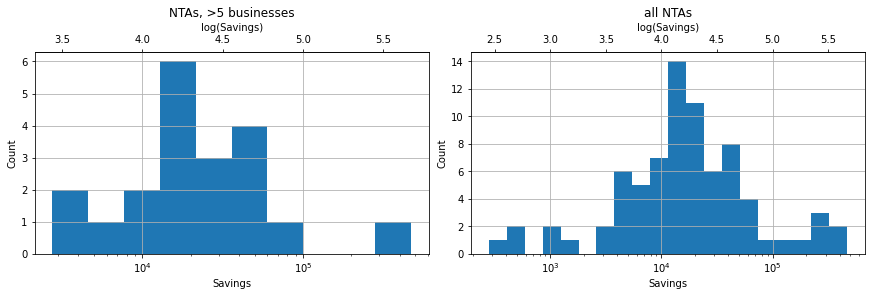

In [209]:
#Two plots
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (12, 4), layout="constrained")

def plot_log_hist(ax, savings, n_bins):
    #calculate log10(Savings)
    savings_log = np.log10(savings.to_numpy())

    #calculate uniform log_bins and respective counts for log10(Savings) values
    counts, log_bins = np.histogram(savings_log, n_bins) #using numpy method

    #transform uniform bins_lof into respective non-uniform bins of Savings values
    bins = 10.**log_bins

    ax.set_xscale('log') # we will use a histogram with log-scale x-axis
    ax.hist(bins[:-1], bins, weights = counts); #plot histogram of precalculated counts and non-uniform bins 
    #Now, the bottom axis reflects log-scale values of Savings
    
    ax.set_xlabel('Savings')
    ax.set_ylabel('Count')

    #Add the secondary axis on top with uniformly spaced log10 ticks.
    #We do it manually, but it should be probably done via tick Locators.
    ax_second = ax.secondary_xaxis("top")
    ax_second.minorticks_off()
    delta = 0.5 #major ticks interval for secondary axis
    low = np.floor(log_bins[0] / delta) * delta
    high = np.ceil(log_bins[-1] /delta) * delta + delta/10
    tick_vals = np.arange(low, high, delta)
    ax_second.set_xticks(10.**tick_vals, tick_vals)
    ax_second.set_xlabel("log(Savings)")
    
    ax.grid(True)

#--------------------------- 1st plot (NTA, with >5 Businesses)
plot_log_hist(ax0, df.Average_total_savings, 10)
ax0.set_title("NTAs, >5 businesses")

#--------------------------- 2nd plot (all NTAs)
df_all = pd.read_csv("Q4_out_aux.csv") #Data for *all* NTAs

#Note: a few values of average savings are negative, so we will filter them out, since we can't log() them.
av_sav_ALL_log = np.log10(df_all[df_all.Average_total_savings > 0.].Average_total_savings.to_numpy())

df_all = df_all[df_all.Average_total_savings > 0.]
plot_log_hist(ax1, df_all.Average_total_savings, 20)
ax1.set_title("all NTAs");

<br><br>
## 3. Line plot of jobs created for each month

In [210]:
df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv", 
                 parse_dates = ["Effective Date"])

#this way we can access fields as .field, instead of ['field']. Also tab-complete works.
df = df.rename(columns = lambda s: str.replace(s, " ", "_")) 
df = df[['Effective_Date', 'Job_created']]

In [211]:
#resample the dataframe with frequency of 1 month
rdf = df.set_index(pd.DatetimeIndex(df.Effective_Date))
rdf.drop(df.columns[0], axis=1, inplace=True)
rdf = rdf.resample('M').sum()

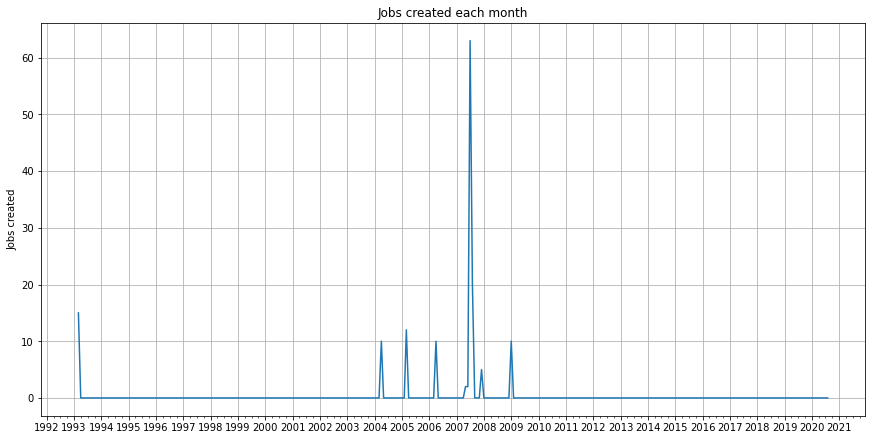

In [212]:
import matplotlib.dates as mdates

dates = rdf.index.to_numpy()
jobs = rdf.Job_created.to_numpy()

fig, ax = plt.subplots(figsize = (12, 6), layout="constrained")
ax.plot(dates, jobs)

ax.set_title("Jobs created each month")
ax.set_ylabel("Jobs created")

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))

ax.grid(True)
